In [1]:
!pip install torch

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('mnist_data/mnist_train.csv',header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


신경망 만들기

In [17]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [58]:
# classifier 클래스
class Classifier(nn.Module):
    
    def __init__(self):
        #부모클래스 초기화
        super().__init__()  # 부모 클래스의 생성자 호출
        
        # 신경망 레이어 정의
        self.model = nn.Sequential(  
            nn.Linear(784, 200),
            nn.LeakyReLU(0.02),
            
            nn.LayerNorm(200),
            
            nn.Linear(200, 10),
            nn.Sigmoid()
        )

        
        
        # 손실함수 설정
        self.loss_function = nn.BCELoss()
        
        # SGD 옵티마이저 설정
        self.optimiser = torch.optim.Adam(self.parameters(), lr = 0.01)
        
        # 변수 초기화
        self.counter = 0
        self.progress = []
        
        pass
    
    def forward(self, inputs):
        # 모델 실행
        return self.model(inputs)
    
    def train(self, inputs, targets):
        # 신경망 출력 계산
        outputs = self.forward(inputs)
        
        # 손실 계산
        loss = self.loss_function(outputs, targets)
        

        # 기울기 초기화, 역전파 실행, 가중치 갱신
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        
        
        # 카운터를 증가시키고 10회마다 오차 저장
        self.counter +=1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass
        
    def plot_progress(self):
        # 진행과정 시각화
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0,1.0), figsize = (16,8), alpha=0.1,marker='.',
               grid=True, yticks=(0, 0.25, 0.5))
        pass

In [59]:
from torch.utils.data import Dataset

In [60]:
class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        # 이미지 목표(레이블)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        
        # 0-255의 이미지를 0-1로 정규화
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values)/255.0
        
        # 레이블, 이미지 데이터 텐서, 목표 텐서 반환
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = "+str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap = 'Blues')

In [61]:
mnist_dataset = MnistDataset("mnist_data/mnist_train.csv")

In [62]:
%%time

# 신경망 생성
C = Classifier()

# MNIST 데이터에 대해 훈련 진행
epochs =3

# MNIST 데이터에 대해 훈련 진행
for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass
    pass

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
Wall time: 5min 29s


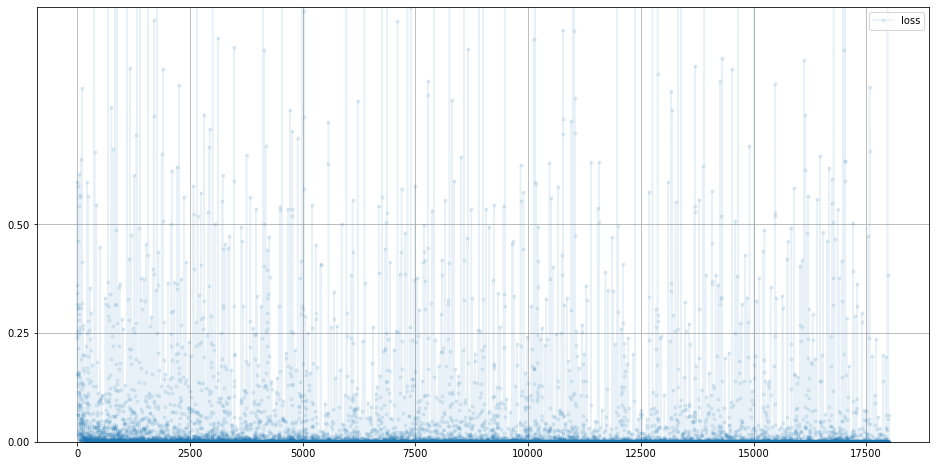

In [63]:
C.plot_progress()

In [64]:
mnist_test_dataset = MnistDataset('mnist_data/mnist_test.csv')

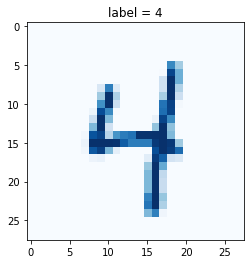

In [65]:
record = 19

mnist_test_dataset.plot_image(record)

<AxesSubplot:>

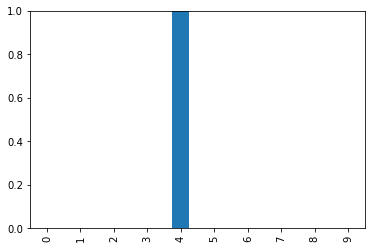

In [66]:
image_data = mnist_test_dataset[record][1]

output = C.forward(image_data)

pd.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [67]:
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    pass

print(score, items, score/items)

9566 10000 0.9566
